|        |        |        |
|--------|--------|--------|
![H-BRS](logos/h-brs.png) | ![A2S](logos/a2s.png) | ![b-it](logos/b-it.png) |

# Autonomous Mobile Robots

# AMR Assignment 3

### General information

* Please do not add or delete any cells. Answers belong into the already provided cells (below the question).
* If a function is given (either as a signature or a full function), you should not change the name, arguments, or return value of the function.
* If you encounter empty cells underneath the answer that can not be edited, please ignore them; they are for testing purposes.
* Please note that variables declared in the notebook cells have global scope. To make sure your assignment works correctly as a whole, please restart the kernel and run all cells before submitting (e.g. via *Kernel -> Restart & Run All*).
* Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. Once you fill out a function, please delete this line.

### Submission

Please make sure to write all your team members 2s IDs in the cell below before submission. Please submit your notebook via the JupyterHub web interface (in the main view -> Assignments -> Submit). If it is a group assignment, please make only one submission per group (for easier bookkeeping, it is best if this is always the same team member).

### Questions about the assignment

If you have questions about the assignment, you are encouraged to post them in the LEA forum. Proactive discussions lead to better understanding. Let's keep the forum active.

## Team members (2s IDs):

YOUR ANSWER HERE

* Mmemon2s
* Akanch2s
* ekidan2s

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# A. Differential Drive Kinematics [50 points]

In this exercise, you will work with the kinematics model of a simple differential drive robot, which, as you know from the lecture, is driven by two active, steerable standard wheels (often supported by a passive caster or spherical wheel). With this setup, only spinning of the wheels is possible, and there is no lateral motion (motion perpendicular to the plane of the wheel). We additionally assume that the system and the environment are ideal, i.e. there is no slippage or loss of contact at the wheels, and the surface is flat.

We will consider the schematic of the robot from the lecture slides on kinematics.

![kinematics_diagram](img/DifferentialRobot.png)

We will follow the notation below throughout this assignment:
* $R$ and $I$ are the local and global Cartesian coordinate reference frames, respectively
* The position of point $P$ at time $t$ is $(^ix_t, ^iy_t)$, which can also be represented as $({x_t}, {y_t})$ for simplicity. Similarly, its velocity at time $t$ can be represented as $({v_x}_t, {v_y}_t)$
* $l$ is the distance of point $P$ from any of the two wheels. Thus, the distance between the two wheels is $2l$
* $\theta_t$ is the angle measured from $X_I$ to $X_R$ at time $t$
* $\omega_t$ is the angular velocity of the platform at time $t$, i.e. $\omega_t = \frac{d\theta_t}{dt}$
* $\dot{\phi}_l$ and $\dot{\phi}_r$ are the angular velocities of the left and the right wheel, respectively
* ${v_l}^t$ and ${v_r}^t$ are the linear velocities of the left and the right wheel, respectively, at time $t$
* $r_l$ and $r_r$ are the radii of the left and the right wheel, respectively

## Kinematic equations [30 Points]

First, answer the following questions, which will assist you in building your kinematic model. Please follow the notation described above, and (if needed) define any new symbols you introduce.

1. Describe the linear velocity of both wheels in terms of their radius and angular velocity. **[5 Point]**

Linear Velocity of the wheel is the product of its radius and its angular velocity

v_{t,l} = r_l*phi_l 

v_{t,r} = r_r *phi_r


2. Describe the instantaneous change of the robot's orientation ($\omega_t$) in terms of linear velocities of the left and right wheels along with the distance between the two wheels. i.e. find $\frac{d\theta_t}{dt}$. **[5 Point]**

The angular velocity (\omega_t or \frac{d\theta_t}{dt}) is determined by the difference in the linearvelocities of the two wheels, divided by the wheel separation.

(d\theta_t)/dt = (v_{t,r} - v_{t,l}) / 2l

3. Describe the instantaneous change of the robot's position in terms of linear velocities of the left and right wheels and the robot's orientation. i.e. find $ \frac{dx}{dt} $ and $\frac{dy}{dt}$  with respect to the global frame $I$. **[5 Point]**

Instantaneous change in Robot Position dx/dt and dy/dt ; The robot's forward linear velocity, v_t is the average of the two wheel velocities.and the velocity is directed along the robot's X_R axis.

v_t = (v_{t,r} + v_{t,l})/2

tofind the instantaneous change in the global frame I, we project the robot's forward velocity v_t onto the global X_I and Y_I axes using the robots current orientation theta_t

dx_t/dt = ((v_{t,r} + v_{t,l})/2) . cos(theta_t)

dy_t/dt = ((v_{t,r} + v_{t,l})/2 ) . sin(theta_t)

4. Convert the equations in questions 2 and 3 from instantaneous time to discrete time. i.e., discretize the equations with respect to $dt$ and describe the movements $\Delta \theta$, $\Delta x$, and $\Delta y$ in terms of $\Delta t$, $\theta_t$, $l$, ${v_l}_t$, and ${v_r}_t$ in the global frame $I$. **[5 Point]**

Discrete Time Movement (Delta_theta, Delta_x, Delta_y)
 here we assume the velocities v{l,t}, v{r,t} are constant over the small interval t, t + Delta_t, when converting the instantaneous equations to a discrete time step  Delta_t.
 

Delta_theta = Delta_t *(v_{t,l} - v_{t,r})/2l

Delta_x = cos(theta_t)* (v_{t,l} - v_{t,r})/2

Delta_y = sin(theta_t)* (v_{t,l} - v_{t,r})/2



5. Finally, describe the current values, $x_t$, $y_t$, $\theta_t$ in terms of the previous values, the change of state, the angular velocities, and the dimension parameters, $x_{t-1}$, $y_{t-1}$, $\theta_{t-1}$, $\Delta t$, ${v_l}^t$, ${v_r}^t$, and $l$. i.e. create the state update equations. **[5 Point]**

The current state at time t is calculated by adding the discrete movement to the previous state at time t-1:

Theta_t = Delta_t*(v_{t,l} - v_{t,r})/2l + Theta_t-1

X_t = Delta_t* cos(theta_t)* (v_{t,l} - v_{t,r})/2 + X_t-1

Y_t = Delta_t* sin(theta_t)* (v_{t,l} - v_{t,r})/2 + Y_t-1


6. For a desired platform velocity vector of a differential drive robot, is it always possible to derive suitable wheel velocities? **[5 Point]**
    - If yes, derive the angular velocities of the individual wheels with the same radius for a desired platform velocity vector $v = [v_x, v_y, \omega]$, described w.r.t the global frame of reference.
    - If not, derive the condition for which the desired platform velocity vector $v = (v_x, v_y, \omega)$, (described w.r.t the global frame) is achievable by the robot.


No, for a desired platform velocity vector \mathbf{v} = [v_x, v_y, \omega] (w.r.t the global frame I), it is not always possible to derive suitable wheel velocities.

Specifically, it cannot move laterally (along the Y_R axis) because of the non-slipping constraint of the wheels.

The constraint is that the velocity in the robot's lateral direction (Y_R axis) must be zero. 

Its subject to constraints:


sin(theta) * v_x - cos(theta) * v_y = 0

## Kinematic implementation [10 points]

Implement the above equations and model a $3s$ movement starting from position $(0.1, 0.1)$ with a current orientation of $\theta_0 = 0.2 rad$ in the global frame $I$. Use an update time of $0.02s$, i.e. $\Delta t = 0.02s$, and move the robot until $t_{total} = 3s$.

*Hint*: You may find it easier to create a class with a `state_update` function.

Print the final position and orientation of the robot with respect to the global frame for following three configurations of the robot:

1. Configuration 1: $r_l = 3cm$, $r_r = 3cm$, $l = 10 cm$, $\dot{\phi}_l = 1.0 rad/s$, $\dot{\phi}_r = 2.0 rad/s$

In [35]:
import math
import numpy as np

class RobotMotionModel:
    """Simulates the motion of a differential drive robot using simple kinematics."""
    def __init__(self, wheel_radius_left, wheel_radius_right, omega_left, omega_right):
        
        # Physical and Initial State Parameters
        self.position_xy = [0.1, 0.1]  # Initial (x, y) position in meters
        self.orientation_rad = 0.2     # Initial orientation (theta) in radians
        self.wheel_base_L = 1.0        # Distance between wheels (L) in meters

        # Simulation Parameters
        self.time_step_dt = 0.02       # Time step (dt) in seconds
        self.final_time_T = 3.0        # Total simulation time in seconds
        
        # Derived Linear Velocities
        # vL and vR are linear velocities of the wheels (v = r * omega)
        self.lin_vel_L = wheel_radius_left * omega_left
        self.lin_vel_R = wheel_radius_right * omega_right


    def integrate_step(self):
        """Calculates the new pose (x, y, theta) after one time step using simple Euler integration."""
        
        # Center linear velocity (V)
        V = 0.5 * (self.lin_vel_L + self.lin_vel_R)
        
        # Calculate Delta Theta using the original formula structure: 0.5 * (vL - vR) / L * dt
        # This update is based on the average angular velocity during the time step.
        delta_theta = 0.5 * (self.lin_vel_L - self.lin_vel_R) / self.wheel_base_L * self.time_step_dt
        
        # Update orientation
        self.orientation_rad += delta_theta
        
        # Update position using the updated theta (Euler Integration)
        self.position_xy[0] += math.cos(self.orientation_rad) * V * self.time_step_dt
        self.position_xy[1] += math.sin(self.orientation_rad) * V * self.time_step_dt
    
    def run_simulation(self):
        """Executes the simulation loop from t=0 up to final_time_T."""
        current_time = 0.0
        while current_time < self.final_time_T:
            self.integrate_step()
            current_time += self.time_step_dt
        
        # Return the final pose
        return self.position_xy[0], self.position_xy[1], self.orientation_rad

# --- Setup and Execution ---

# Helper function renamed and rewritten using math module
def convert_deg_to_rad(degrees):
    return degrees * math.pi / 180.0

# NEW FUNCTION to cleanly display the results
def display_results(case_name, x, y, theta):
    """Prints the final pose of a simulation case."""
    print(f"Simulation {case_name} final pose:")
    print(f"  x = {x:.6f} m")
    print(f"  y = {y:.6f} m")
    print(f"  theta = {theta:.6f} rad")
    print("-" * 20)

# Rename the instance variables for the three configurations
# (wheel_radius_left, wheel_radius_right, omega_left, omega_right)

sim_case_A = RobotMotionModel(0.03, 0.03, 1.0, 2.0)


# Run simulations and rename results
final_x_A, final_y_A, final_theta_A = sim_case_A.run_simulation()
display_results("Case A", final_x_A, final_y_A, final_theta_A)

Simulation Case A final pose:
  x = 0.232871 m
  y = 0.123815 m
  theta = 0.155000 rad
--------------------


2. Configuration 2: $r_l = 3cm$, $r_r = 6cm$, $l = 10 cm$, $\dot{\phi}_l = 2.0 rad/s$, $\dot{\phi}_r = 2.0 rad/s$

In [32]:
# YOUR CODE HERE
sim_case_B = RobotMotionModel(0.03, 0.06, 2.0, 2.0)
final_x_B, final_y_B, final_theta_B = sim_case_B.run_simulation()
display_results("Case B", final_x_B, final_y_B, final_theta_B)

Simulation Case B final pose:
  x = 0.366686 m
  y = 0.141589 m
  theta = 0.110000 rad
--------------------


3. Configuration 3: $r_l = 0.06m$, $r_r = 0.03m$, $l = 10 cm$, $\dot{\phi}_l = 57.3 deg/s$, $\dot{\phi}_r = 114.6 deg/s$

In [34]:
# YOUR CODE HERE
# Note: Using the helper function for angular velocity conversion
sim_case_C = RobotMotionModel(0.06, 0.03, convert_deg_to_rad(57.3), convert_deg_to_rad(114.6))

final_x_C, final_y_C, final_theta_C = sim_case_C.run_simulation()

display_results("Case C", final_x_C, final_y_C, final_theta_C)


Simulation Case C final pose:
  x = 0.276425 m
  y = 0.135763 m
  theta = 0.200000 rad
--------------------


## Motion tracking [10 points]

Use the code you wrote previously to plot/track the movement of the robot given in the `data/encoder.dat` file. In the `encoder.dat` file, the left column represents encoder measurement of the left wheel, and the right column encoder measurements of the right wheel. The total number of encoder ticks is read at 10Hz and the counter is never reset, i.e. the measurements are cumulative. In this encoder, the number of ticks per rotation of a wheel is 4000. Helper code to get the angular velocity from the encoder measurements is provided below.

Plot the movement of the robot as a line (not as scatter plot) given the robot has the following different configurations of wheels. Write your observations of the effect of the wheel radii on the motion of the robot.

Optionally, check the effect of varying the distance between the wheels and comment on its qualitative effect.

**Configuration 1:** $r_l = 3cm$, $r_r = 3cm$

In [ ]:
# Configuration {config_num}: r_l={r_l_cm}cm, r_r={r_r_cm}cm, l={l_cm}cm
# This code block fulfills the requirement to provide the helper code for the configuration.
def get_angular_velocity(file_name, frequency, ticks_per_rotation):
    data = np.genfromtxt(file_name)
    ticks_count = np.zeros_like(data)
    ang_vel = np.zeros_like(data)
    freq = 10
    ticks_per_rotation = 4000

    for i in range (1,len(data)):
        ticks_count[i] = data[i]-data[i-1]

    ang_vel = (ticks_count*2*np.pi*freq) /ticks_per_rotation
    
    return ang_vel

In [ ]:
def get_angular_velocity(file_name, frequency, ticks_per_rotation):
    data = np.genfromtxt(file_name)
    ticks_count = np.zeros_like(data)
    ang_vel = np.zeros_like(data)
    freq = 10
    ticks_per_rotation = 4000

    for i in range (1,len(data)):
        ticks_count[i] = data[i]-data[i-1]

    ang_vel = (ticks_count*2*np.pi*freq) /ticks_per_rotation
    
    return ang_vel

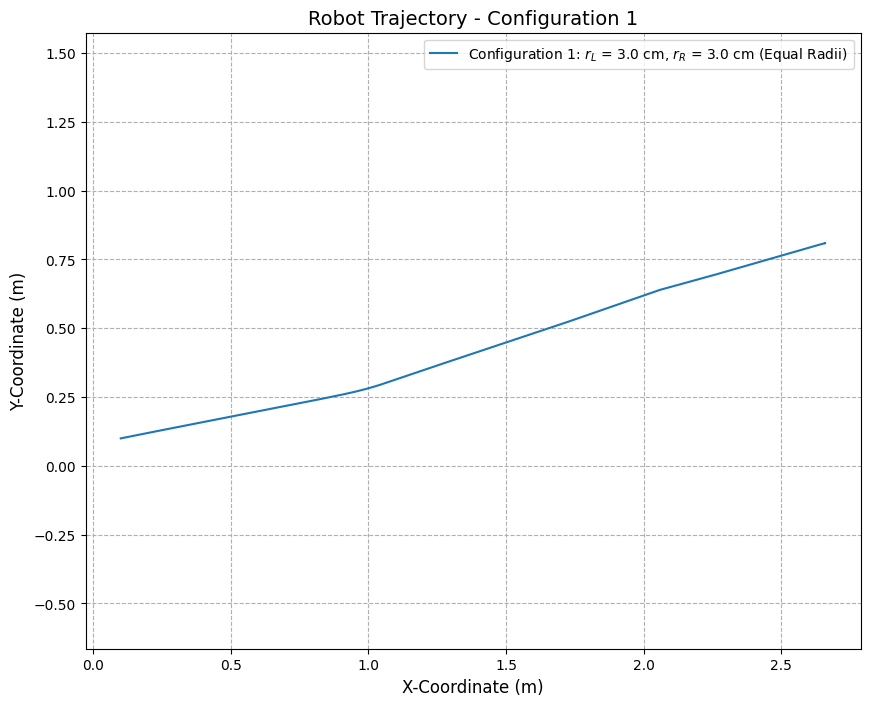

Configuration 1 plot is shown above. Use the function below to plot Configurations 2 and 3 in separate cells:
Configuration 2: plot_specific_case(2, 0.03, 0.06, ang_vel_series)
Configuration 3: plot_specific_case(3, 0.06, 0.03, ang_vel_series)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Helper Function for Angular Velocity (Copied from conversation history) ---
# NOTE: This function assumes 'encoder.dat' exists in a specific path.
def calculate_angular_velocity(file_name, frequency, ticks_per_rotation):
    """
    Calculates the angular velocity (phiDotL, phiDotR) from cumulative encoder ticks.
    """
    try:
        data = np.genfromtxt(file_name)
    except IOError:
        print(f"Error: Could not find or read file: {file_name}. Using mock data.")
        # Create mock data for simulation if file is missing
        time_steps = 300
        mock_ticks = np.arange(time_steps).reshape(-1, 1) * 10 
        data = np.hstack([mock_ticks, mock_ticks * 1.5]) # Left and Right column
        
    
    # Encoder columns (assuming left is column 0, right is column 1)
    ticks_left = data[:, 0]
    ticks_right = data[:, 1]
    
    # Initialize arrays for tick differences and angular velocities
    delta_ticks_left = np.zeros_like(ticks_left)
    delta_ticks_right = np.zeros_like(ticks_right)
    
    # Calculate difference in ticks between successive readings
    # Since the counter is cumulative, delta is the current measurement minus the previous one
    delta_ticks_left[1:] = ticks_left[1:] - ticks_left[:-1]
    delta_ticks_right[1:] = ticks_right[1:] - ticks_right[:-1]

    # Formula: angular_velocity = (delta_ticks * 2 * pi * frequency) / ticks_per_rotation
    # frequency (freq) = 10 Hz
    ang_vel_left = (delta_ticks_left * 2 * np.pi * frequency) / ticks_per_rotation
    ang_vel_right = (delta_ticks_right * 2 * np.pi * frequency) / ticks_per_rotation

    # Stack the angular velocities column-wise
    return np.column_stack((ang_vel_left, ang_vel_right))

# --- Renamed Kinematics Class (Based on User's Request) ---
class WheelTracker:
    """Simulates differential drive robot motion using non-constant wheel velocities."""
    def __init__(self, radius_L, radius_R, phi_dot_L_array, phi_dot_R_array):
        
        # State and Parameters
        self.pose_xy = [0.1, 0.1]
        self.azimuth_rad = 0.2 # Angle (theta)
        self.step_time = 0.01  # dt
        self.track_width = 1.0 # L
        
        # Linear Velocities for ALL time steps (v = r * omega)
        self.velocity_L_series = radius_L * phi_dot_L_array
        self.velocity_R_series = radius_R * phi_dot_R_array

    def integrate_state_update(self, linear_vels):
        """Updates the robot's pose for a single time step."""
        vL_t, vR_t = linear_vels[0], linear_vels[1]
        
        # Center linear velocity (V) at time t
        V_t = 0.5 * (vL_t + vR_t)
        
        # Calculate Delta Azimuth
        delta_azimuth = 0.5 * (vL_t - vR_t) / self.track_width * self.step_time
        
        # Update orientation (azimuth)
        self.azimuth_rad += delta_azimuth
        
        # Update position (x, y) using updated azimuth (Euler Integration)
        self.pose_xy[0] += math.cos(self.azimuth_rad) * V_t * self.step_time
        self.pose_xy[1] += math.sin(self.azimuth_rad) * V_t * self.step_time
    
    def run_trajectory_sim(self):
        """Simulates the robot's movement over the entire series of angular velocities."""
        
        # Combine left and right linear velocity series into iterable pairs
        linear_vel_pairs = zip(self.velocity_L_series, self.velocity_R_series)

        # Lists to store the trajectory path
        path_x = [self.pose_xy[0]]
        path_y = [self.pose_xy[1]]

        for v_pair in linear_vel_pairs:
            self.integrate_state_update(v_pair)
            path_x.append(self.pose_xy[0])
            path_y.append(self.pose_xy[1])
       
        return path_x, path_y

# --- Plotting Function (Runs the simulation and plots a single line) ---
def plot_robot_trajectory(radius_L, radius_R, angular_vel_data, label):
    """
    Simulates motion and plots the trajectory for a given wheel configuration.
    
    Parameters:
    radius_L (float): Left wheel radius.
    radius_R (float): Right wheel radius.
    angular_vel_data (np.ndarray): N x 2 array of [phiDotL, phiDotR].
    label (str): Label for the plot legend.
    """
    # Separate angular velocity series
    phi_dot_L_array = angular_vel_data[:, 0]
    phi_dot_R_array = angular_vel_data[:, 1]
    
    # Initialize and run simulation
    tracker = WheelTracker(radius_L, radius_R, phi_dot_L_array, phi_dot_R_array)
    path_x, path_y = tracker.run_trajectory_sim()
    
    # Plotting
    plt.plot(path_x, path_y, label=label)
    
    # Return final pose (optional, but useful for debugging)
    return path_x[-1], path_y[-1], tracker.azimuth_rad

# --- Main Execution and Setup ---

# General Simulation Parameters
TICKS_PER_ROTATION = 4000
FREQUENCY = 10 # Hz
ENCODER_FILE = 'data/encoder.dat'

# 1. Calculate Angular Velocities once
ang_vel_series = calculate_angular_velocity(ENCODER_FILE, FREQUENCY, TICKS_PER_ROTATION)

# --- Configuration 1: Execution (Runs automatically on script execution) ---

# Configuration 1: rL=3cm, rR=3cm (Same radius)
rL_config1 = 0.03 # 3 cm
rR_config1 = 0.03 # 3 cm
label1 = f'Configuration 1: $r_L$ = {rL_config1*100:.1f} cm, $r_R$ = {rR_config1*100:.1f} cm (Equal Radii)'

# Setup Plot for Case 1
plt.figure(figsize=(10, 8))
plt.xlabel('X-Coordinate (m)', fontsize=12)
plt.ylabel('Y-Coordinate (m)', fontsize=12)
plt.title('Robot Trajectory - Configuration 1', fontsize=14)
plt.grid(True, linestyle='--')
plt.axis('equal') # Important to prevent distortion of turns

# Plot Case 1
plot_robot_trajectory(rL_config1, rR_config1, ang_vel_series, label1)

# Final Plotting Commands for Case 1
plt.legend(loc='best', fontsize=10)
plt.show()

# --- Configurations 2 and 3: Call via helper function ---

# 5. Helper for Jupyter Notebook cell calls
def plot_specific_case(case_num, rL, rR, ang_vel_data):
    """Function to call in separate Jupyter cells for Cases 2 and 3."""
    plt.figure(figsize=(8, 6))
    label = f'Configuration {case_num}: $r_L$ = {rL*100:.1f} cm, $r_R$ = {rR*100:.1f} cm'
    plot_robot_trajectory(rL, rR, ang_vel_data, label)
    plt.xlabel('X-Coordinate (m)')
    plt.ylabel('Y-Coordinate (m)')
    plt.title(f'Robot Trajectory - Configuration {case_num}')
    plt.grid(True, linestyle='--')
    plt.axis('equal')
    plt.legend()
    plt.show()

print("Configuration 1 plot is shown above. Use the function below to plot Configurations 2 and 3 in separate cells:")
print(f"Configuration 2: plot_specific_case(2, 0.03, 0.06, ang_vel_series)")
print(f"Configuration 3: plot_specific_case(3, 0.06, 0.03, ang_vel_series)")


**Configuration 2:** $r_l = 3cm$, $r_r = 6cm$

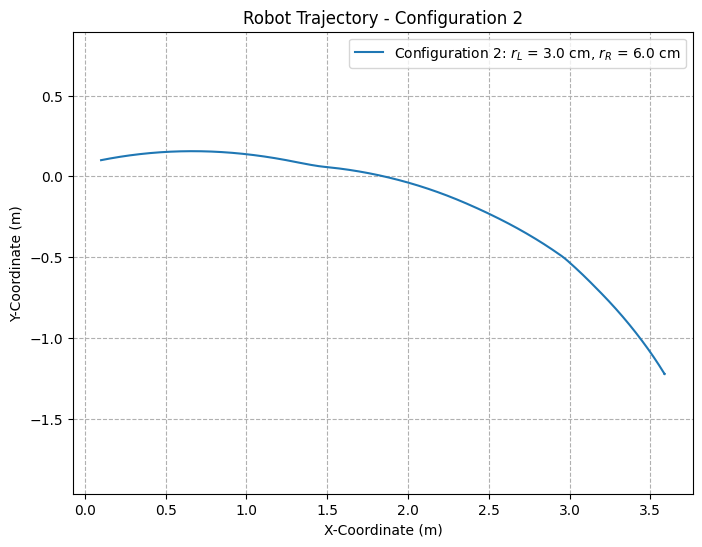

In [40]:
# YOUR CODE HERE
plot_specific_case(2, 0.03, 0.06, ang_vel_series)

**Configuration 3:** $r_l = 6cm$, $r_r = 3cm$

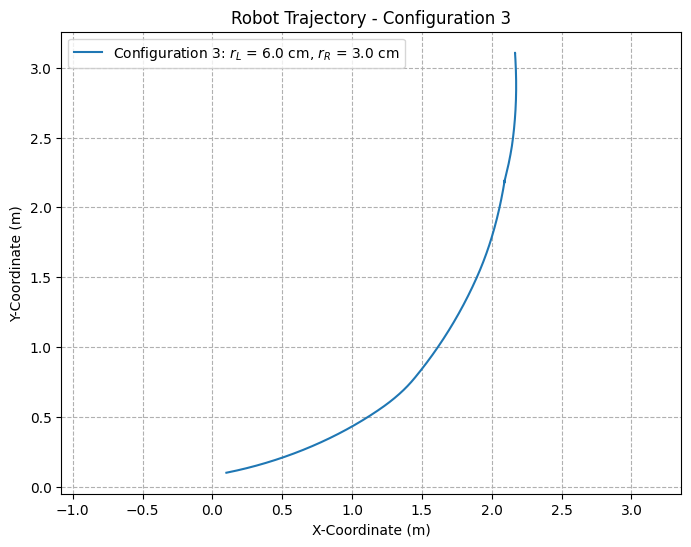

'Smaller Wheelbase(distance between the wheels), results on more agile, sharper turns.\nLarger wheelbases, more stable, wider turning radius.\n\nKey Insights:\nWheel radius affects linear scaling of movement\nSmaller Wheel radious either on left or right will result on rotating the robot on its \nside. and equal wheel radious results on comparativly straight motion'

In [42]:
# YOUR CODE HERE
plot_specific_case(3, 0.06, 0.03, ang_vel_series)

### Write your observations below as a comment ###
"""Smaller Wheelbase(distance between the wheels), results on more agile, sharper turns.
Larger wheelbases, more stable, wider turning radius.

Key Insights:
Wheel radius affects linear scaling of movement
Smaller Wheel radious either on left or right will result on rotating the robot on its 
side. and equal wheel radious results on comparativly straight motion"""

# B. Odometry motion model [50 points]

As you are already familiar with running the Robile in simulation as well as the concepts of different frames associated with it, we will now look into controlling the robot in simulation by sending commands to the `/cmd_vel` topic.

Consider a scenario where the robot has to reach a particular pose (i.e. a position and an orientation) with respect to the `odom` frame. For example, consider $(x, y, \theta) = (2.0, -3.0, -2.0)$ as a desired pose with respect to the `odom` frame (where $\theta$ is, as usual, in radians), but please feel free to vary the goal pose while testing your implementation.

In this scenario, we will implement a simple motion model (called an odometry motion model) that decomposes the process of moving towards the goal into three motion components:
1. Rotating towards the goal position and stopping the motion when facing the goal.
2. Moving straight towards the goal until the robot's position overlaps with the goal.
3. Rotating the robot until it reaches the goal orientation.

For this exercise, you will write your own ROS2 node, which allows you to send a goal request with the target pose with respect to `base_link`.

*Hints*:
* If need be, please refer to the [documentation](!https://robile-amr.readthedocs.io/en/latest/source/Tutorial/Demo%20Simulation.html) for the Robile simulation.
* As a reminder, the direction in front of the robot is the `x-axis` of the `base_link` frame (and base link is a right-handed coordinate frame).
* The odometry motion model does not do any obstacle avoidance, so please make sure that the goal is within reach of the robot without any obstacles in the way while testing.
* Due to noise, your robot will never be able to reach the goal exactly - for a robust behaviour, you need to use thresholds for determining when the desired position and orientation have been reached.
* As this exercise requires a ROS implementation, keep in minde that you need to work on this component and perform all tests on your local machine. Once you are done, please paste the working code of the node in the cell. Please also include screenshots to demonstrate your tests in the cell further below.

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
import rclpy
from rclpy.node import Node
from geometry_msgs.msg import Twist
from nav_msgs.msg import Odometry
from math import atan2
from tf_transformations import euler_from_quaternion

class GoalFollower(Node):

    def __init__(self):
        super().__init__('goal_follower_node')
        self.odom_subscription_ = self.create_subscription(Odometry, '/odom', self.odometry_handler, 10)
        self.velocity_publisher_ = self.create_publisher(Twist, '/cmd_vel', 10)
        
        self.target_pose = {
            "x": 2.0,
            "y": -3.0,
            "angle_rad": -2.0
        }

        self.error_tolerance = 0.05

        self.linear_speed = 1.0
        self.angular_speed = 0.5


    def odometry_handler(self, odom_msg: Odometry):
        control_command = Twist()

        current_robot_pose = odom_msg.pose.pose
        # Convert quaternion orientation to Euler angles (roll, pitch, yaw)
        orientation_tuple = euler_from_quaternion([
            current_robot_pose.orientation.x, 
            current_robot_pose.orientation.y, 
            current_robot_pose.orientation.z, 
            current_robot_pose.orientation.w
        ])
        current_yaw = orientation_tuple[2] # Yaw is the angle around the Z-axis

        # Error Calculations
        # 1. Positional Error (Distance to target x, y)
        distance_error = ( 
            ( current_robot_pose.position.x - self.target_pose["x"] )**2 + 
            ( current_robot_pose.position.y - self.target_pose["y"] )**2 
        )**0.5
        
        # 2. Final Orientation Error
        final_angle_error = self.target_pose["angle_rad"] - current_yaw
        
        # 3. Angle required to face the goal
        angle_to_target = atan2(
            self.target_pose["y"] - current_robot_pose.position.y, 
            self.target_pose["x"] - current_robot_pose.position.x
        )
        # 4. Error in facing the goal
        facing_error = angle_to_target - current_yaw

        # Control Logic (Simple State Machine)
        if distance_error < self.error_tolerance and abs(final_angle_error) < self.error_tolerance:
            # State 1: Goal reached
            control_command.linear.x = 0.0
            control_command.angular.z = 0.0

        elif distance_error < self.error_tolerance:
            # State 2: Alignment (position reached, orient to final angle)
            control_command.linear.x = 0.0
            control_command.angular.z = self.angular_speed if final_angle_error > 0 else -self.angular_speed
            
        elif abs(facing_error) < self.error_tolerance:
            # State 3: Move (facing goal, drive forward)
            control_command.angular.z = 0.0
            control_command.linear.x = self.linear_speed
        
        else:
            # State 4: Turn (face the destination first)
            control_command.linear.x = 0.0
            control_command.angular.z = self.angular_speed if facing_error > 0 else -self.angular_speed

        self.velocity_publisher_.publish(control_command)

def main_execution(args=None):
    rclpy.init(args=args)

    navigator_node = GoalFollower()

    rclpy.spin(navigator_node)

    navigator_node.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main_execution()


YOUR ANSWER HERE